In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/91911/OneDrive/Documents/Desktop/Project/data/google_play_data.csv')


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


### 1. What is the distribution of free vs. paid apps?

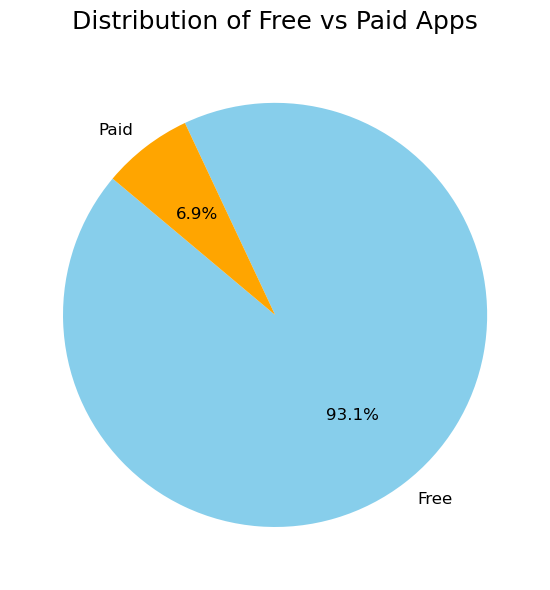

In [6]:
# Count free and paid apps
app_type_counts = df['Type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
app_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Free vs Paid Apps', fontsize=18, pad=15)
plt.ylabel('')  # Remove y-label for a cleaner look
plt.tight_layout()
plt.show()


### 2. What percentage of apps fall into Top 10 category?

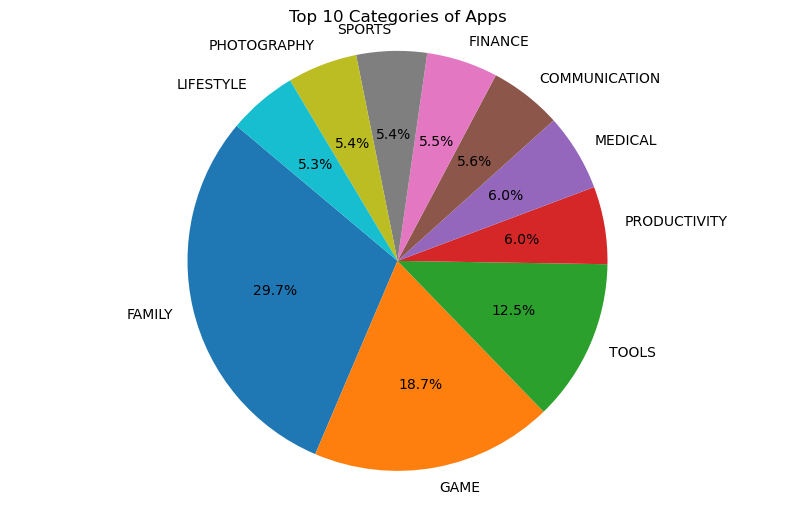

In [9]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Filter to keep only the top 10 categories
top_categories = category_counts.head(10)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categories of Apps')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

### 3. Top 10 most reviewed Categories

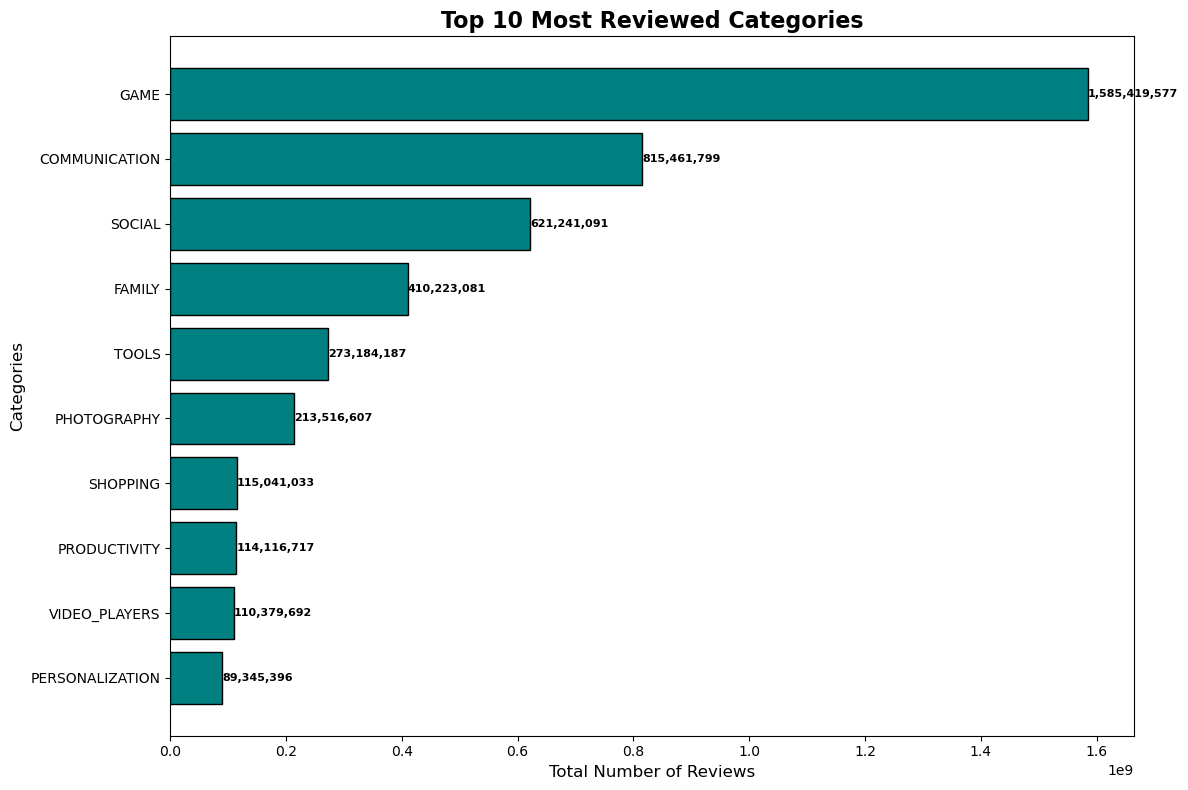

In [73]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop rows with missing or invalid 'Reviews'
df = df.dropna(subset=['Reviews'])

# Group by 'Category' and sum the reviews for each category
category_reviews = df.groupby('Category')['Reviews'].sum().reset_index()

# Sort the categories by total reviews in descending order and pick the top 10
top_category_reviews = category_reviews.sort_values(by='Reviews', ascending=False).head(10)

# Create a clean horizontal bar chart for top 10 most reviewed categories
plt.figure(figsize=(12, 8))
bars = plt.barh(top_category_reviews['Category'], top_category_reviews['Reviews'], color='teal', edgecolor='black')

# Invert y-axis to display the highest-reviewed category at the top
plt.gca().invert_yaxis()

# Add title and labels
plt.title('Top 10 Most Reviewed Categories', fontsize=16, fontweight='bold')
plt.xlabel('Total Number of Reviews', fontsize=12)
plt.ylabel('Categories', fontsize=12)

# Annotate the bars with the total number of reviews for each category
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):,}',
             va='center', ha='left', fontsize=8, color='black', weight='bold')

# Customize tick labels to avoid overlap
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

### 4. Average of Rating by Category

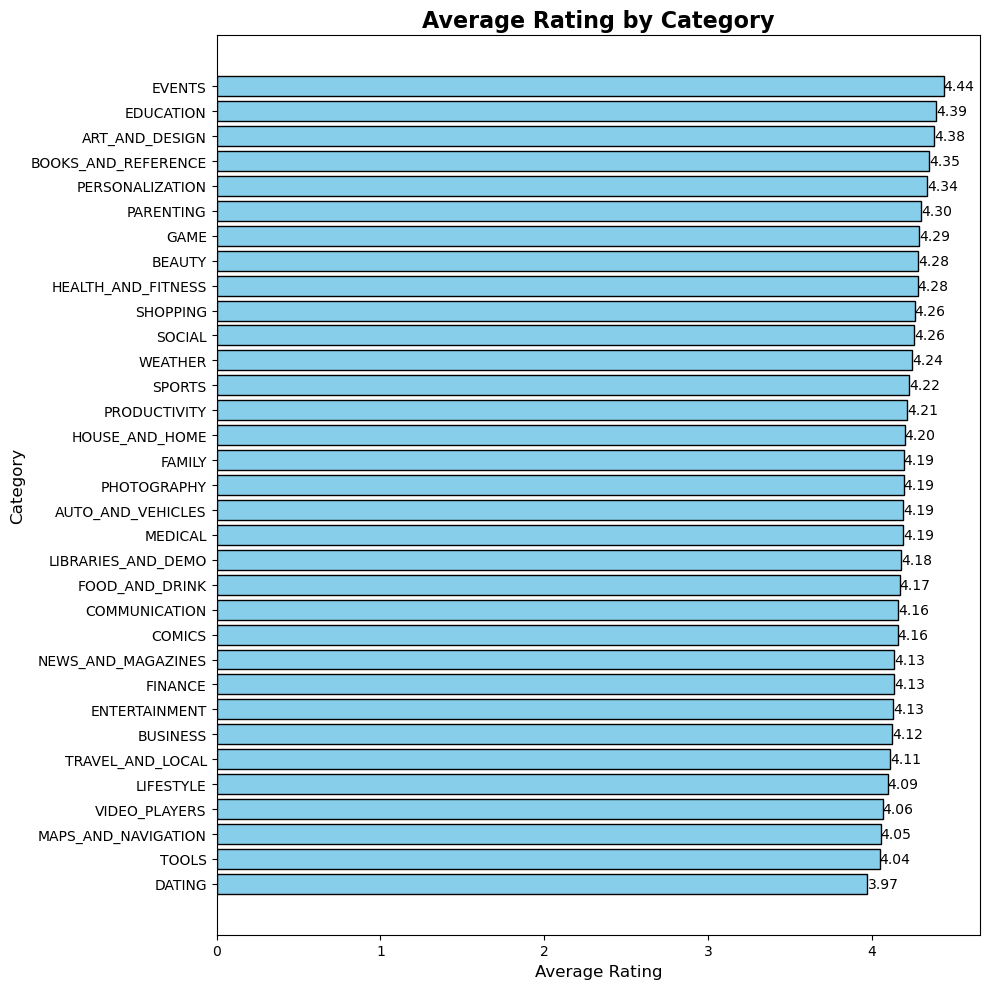

In [104]:
# Convert the 'Rating' column to numeric (if it's not already)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing or invalid 'Rating'
df = df.dropna(subset=['Rating'])

# Group by 'Category' and calculate the average rating for each category
category_avg = df.groupby('Category')['Rating'].mean().reset_index()

# Sort the categories by average rating
category_avg = category_avg.sort_values(by='Rating', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(category_avg['Category'], category_avg['Rating'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Rating by Category', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Invert y-axis to have the highest average rating at the top
plt.gca().invert_yaxis()

# Annotate the bars with their average ratings
for index, value in enumerate(category_avg['Rating']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

### 5.  Which Android Version supports the highest number of apps?

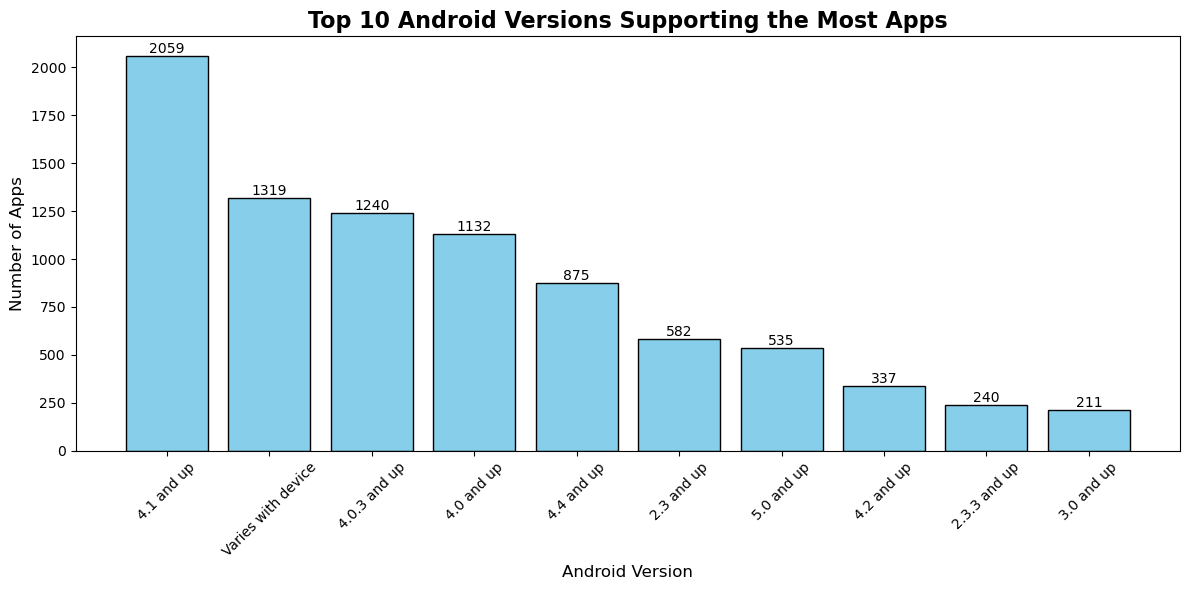

In [112]:
# Count the number of apps for each Android Version
android_ver_counts = df['Android Ver'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(android_ver_counts.index, android_ver_counts.values, color='skyblue', edgecolor='black')

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Top 10 Android Versions Supporting the Most Apps', fontsize=16, fontweight='bold')
plt.xlabel('Android Version', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()